<a href="https://colab.research.google.com/github/rajeevak40/Text_Analytics/blob/main/Document_Scanning_and_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective**
The main objective this project is document scanning, where the documents are in terms of its textual and contextual similarity.



## **Procedure**

1.	Upload the files.
2.	Preprocess the data using Regex 
3.	Performing Text analytics.
4.	Computing similarity scores using various text analysis tool.
5.	Comparing the score for conclusion.




In [3]:
!pip install docx2txt --upgrade --quiet
!pip install cufflinks --upgrade --quiet
!pip install textblob  --upgrade --quiet
!pip install transformers --upgrade --quiet
!pip install python-docx --upgrade --quiet

     |████████████████████████████████| 636 kB 14.4 MB/s 
     |████████████████████████████████| 3.1 MB 13.5 MB/s 
     |████████████████████████████████| 3.3 MB 53.7 MB/s 
     |████████████████████████████████| 59 kB 4.5 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
     |████████████████████████████████| 895 kB 68.9 MB/s 
     |████████████████████████████████| 5.6 MB 14.7 MB/s 


In [4]:
# Importing required libraries
import cufflinks as cf
import textblob as textblob
import seaborn as sn
#import docx2txt
import docx
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.util import ngrams
nltk.download('wordnet')
from gensim.parsing.preprocessing import remove_stopwords
import regex
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from google.colab import files
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
#from transformers import pipeline
#classifer=pipeline("sentiment-analysis" )

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## **Loading Data**

In [5]:
# Loading Data from Storage
print("Choose the files to be compared :")
uploaded_files=files.upload()

Choose the files to be compared :


Saving Document 1.docx to Document 1.docx
Saving Rajeev_AK_CloudSales (1).docx to Rajeev_AK_CloudSales (1).docx


In [6]:
# Printing name of files uploaded
keys=list(uploaded_files.keys())
print(keys)

['Document 1.docx', 'Rajeev_AK_CloudSales (1).docx']


In [7]:
# Storing documets to variables
docs=[]
for key in keys:
  doc_file=docx.Document(key)
  paras=doc_file.paragraphs
  sent=[]
  for para in paras:
    sent.append(para.text)
  docs.append(sent)
print(docs)


[['Thoughtworks is searching for a Senior Outbound Business Development Manager to join our Central office to support our growing clients in North America. Business Development Managers at Thoughtworks are responsible for developing and securing a pipeline of new opportunities and establishing an early relationship with the client. ', '\n\n', 'What to expect:', '\n\n', 'Develop a pursuit plan and a pipeline of new clients and client engagements.', 'Successfully convert new target accounts, creating the foundation for long-term, value-based relationships. Success is nurturing and the sale of win-win value propositions and nurturing executive relationships for continuing business.', 'Ensure the creation and execution of pursuit strategies, and build “win-win” value propositions at the company and at individual levels with clients', 'Approach client executives as true business partners versus software delivery partners, expanding Thoughtworks engagement to encompass the breadth and depth 

## **PreProcessing Data**


#### Some of the common text preprocessing / cleaning steps are:

Lower casing:

This is most common and first step towards data cleaning, lower casing helps in text featurization techniques like frequency, tfidf,  reducing the duplication and get correct counts. However, lower casing will not help in  case of task like Speech Tagging or sentiment Analysis. Lower casing is done by default in vectorizers and tokenizers
  

In [8]:
# Converting document to lower case
text=[]
for doc in docs:
  doc1=''.join(doc)
  text.append(doc1.lower())
print(text)

['thoughtworks is searching for a senior outbound business development manager to join our central office to support our growing clients in north america. business development managers at thoughtworks are responsible for developing and securing a pipeline of new opportunities and establishing an early relationship with the client. \n\nwhat to expect:\n\ndevelop a pursuit plan and a pipeline of new clients and client engagements.successfully convert new target accounts, creating the foundation for long-term, value-based relationships. success is nurturing and the sale of win-win value propositions and nurturing executive relationships for continuing business.ensure the creation and execution of pursuit strategies, and build “win-win” value propositions at the company and at individual levels with clientsapproach client executives as true business partners versus software delivery partners, expanding thoughtworks engagement to encompass the breadth and depth of our capabilities, includin

Removal of Stopwords and Punctuations : 

Another common text preprocessing technique is removal  the punctuations from the document. This is standardization process where punctuations such as “!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`” are excluded depending on the use case. 

Stopwords on other hand are commonly found words like 'the', 'a', ‘an’ , etc. .They can be removed from the text as they do not provide valuable information. In case of Speech tagging, stop words give very valuable information. Stop-words are already listed for english language in nltk package


In [9]:
 # Removing puchuations form the text
text_1=[]
for doc in text:
  text_1.append(re.sub(r'[^\w\s]','',doc))

In [10]:
# Getting rid of stopwords
text_2=[]
for doc in text_1:
  text_2.append(remove_stopwords(doc))


Stemming

Stemming is the process of reducing inflected words to their word stem, base or root form. There are several type of stemming algorithms of which porter stemmer is famous. This is avaiable in NLTK package.

In [11]:
stemmer = PorterStemmer()
nltk.download('punkt')
text_1=[]

for sen in text_2:
  sentence_words = nltk.word_tokenize(sen)
  doc=[]
  for word in sentence_words:
    doc.append(stemmer.stem(word))
    doc.append(" ")
  text_1.append("".join(doc))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language. WordNetLemmatizer is used here.


In [12]:

lemmatizer = WordNetLemmatizer()

text=[]

for sen in text_2:
  sentence_words = nltk.word_tokenize(sen)
  doc1=[]
  for word in sentence_words:
    doc1.append(lemmatizer.lemmatize(word))
    doc1.append(" ")
  text.append("".join(doc1))



Based on the out from previous two code sets it seems Lemmatization is better, hence going ahead with "text".

### **Analysing documents using Text Analytics**


In [13]:
i=0
for key in keys:
  print(f"Number of words in {key} is : {len(text[i].split())}")
  i=i+1

Number of words in Document 1.docx is : 313
Number of words in Rajeev_AK_CloudSales (1).docx is : 341


Analyzing key words in each document can be easily done by plotting them on word cloud. Word cloud quickly helps us to identify few key words which are stressed upon by the documents being reviewed. However, number of key words to be plotted is our choice.

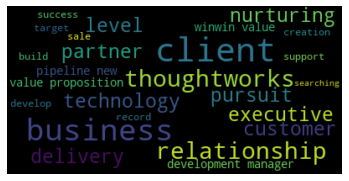

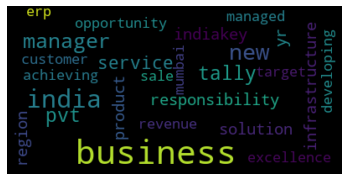

In [14]:
# Plotting word cloud with unigram
for doc in text:
  word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto',margin=2,mode ='RGBA', max_words=25 ).generate(doc)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

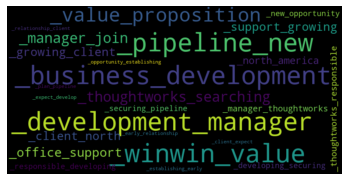

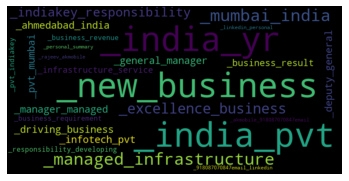

In [29]:
# Plotting word cloud with bigram
bigram_sentence=[]
for sen in text:
  bigram_words=[]
  bigrams = ngrams(sen.split(), 2)
  for grams in bigrams:
    words=''
    for gram in grams:
      words= words+'_'+gram
    bigram_words.append(words)
  bigram_sentence.append(" ".join(bigram_words))  

for sen in bigram_sentence:
  word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto', collocations=False , margin=2, mode ='RGBA', scale=2, repeat=False, max_words=25 ).generate(str(sen))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  


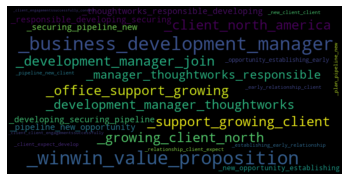

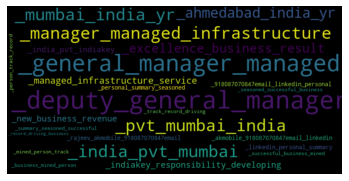

In [30]:

# Plotting word cloud with trigram
trigram_sentence=[]
for sen in text:
  trigram_words=[]
  trigrams = ngrams(sen.split(), 3)
  for grams in trigrams:
    words=''
    for gram in grams:
      words= words+'_'+gram
    trigram_words.append(words)
  trigram_sentence.append(" ".join(trigram_words))

for sen in trigram_sentence:
  word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto', collocations=False , margin=2, mode ='RGBA', scale=2, repeat=False, max_words=25 ).generate(str(sen))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()



While we were able to identify few key words in the documents in question. Now we may have to look at the similarities between the documents. The similarities must be in lines of context and closeness, in terms of  data science we may have to look for semantic similarity and lexical similarities.

###**Computing Similarity Scores**

As mentioned earlier there are two ways of looking at similarity one is at word level and another is at context level. Two phrases may appear similar if most of the words in both of them overlaps but this does not account actual meaning of the phrase. This can be done by considering semantic similarity  where we focus on phrase or lexical chain. The text is broken groups of related words and compute the  similarity. 

Some of the most common ways of calculating similarities are Cosine Similarity, Euclidean Distance , and Jaccard Distance.
Cosine Similarity is the cosine of the angle between two vectors, which gives us the angular distance between the vectors. 
 

Euclidean Distance on other hand estimates the dissimilarity. It is one of the form of Minkowski distance.
 

Jaccard Distance is used to calculate the similarity between two finite sets. Cosine or Euclidean distance is used when the documents are represented in vector space where as Jaccard Distance is used if we consider our documents as sets or collections of words without any semantic meaning.


Hence, our computation will be basically on Cosine and Euclidean distance.




In [37]:
# Starting with the simplest method computing Cosine Similarity using count vectorizer
cv=CountVectorizer()
count_matrix= cv.fit_transform(text)
cos_sim_matrix = cosine_similarity(count_matrix)
print(cos_sim_matrix)
#cos_sim= round ((cos_sim_matrix[0][1]*100),2)

[[1.         0.36282732]
 [0.36282732 1.        ]]


In [19]:
# Simple Euclidean distance computation using count vectorizer
features=[]
for i in range(len(text)):
  features.append(cv.fit_transform(tec[]).todense())
  print(cv.vocabulary_)

for f in features:
  euc_dist= euclidean_distances(features[0], f)
print(euc_dist)    


SyntaxError: ignored

All the above similarity is in terms of exact words which does not mean that the documents are similar in terms of the meaning or context. Hence, we may have to look at similarity in a bit advanced level. 
When similarity is computed based on meaning, we call it semantic text similarity. Due to the complexities of natural language, this is a very complex task to accomplish and modern methods to compute similarity try to take the semantics into account.



Word embedding helps in improving accuracy while computation of semantic similarity. As per Wikipedia “In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”






#### TFIDF
Term Frequency-Inverse Document Frequency (TF-IDF) is a technique for text vectorization that is based on the Bag of words model. In fact,  it  performs better than the BoW as it considers the importance of the word in a document into consideration. The main limitation is that it does not capture the semantic meaning of the words. 



In [ ]:
DF = {}
for i in range(len(text)):
    tokens = text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}


In [ ]:
# TFIDF
tf_idf = {}
for i in range(N):
    tokens = text[i]
    counter = Counter(tokens + processed_title[i])
    for token in np.unique(tokens):
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log(N/(df+1))
        tf_idf[doc, token] = tf*idf

This limitation of TFIDF can be overcome by more advanced techniques such as word2Vec.

#### Word2Vec

Word embedding is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words. Word2Vec is one of the most popular technique to learn word embeddings. It can be obtained using two methods using Neural Networks : Skip Gram and Common Bag Of Words (CBOW).  While CBOW Model takes the context of each word as the input and tries to predict the word corresponding to the context, Skip Gram is just the opposite. The model uses the current word to predict the surrounding window of context words.

In [ ]:
# Word2Vec



#### Doc2Vect

Inability to handle unknown vocabularies, lack of representation at sub-word levels and limitation to scale to new languages requires new embedding techniques. Doc2vec tackles the problem by including a global context through capturing the semantic meanings of the document. The average of the word embeddings in a document is used to represent the global context. The Doc2Vec is an implementation of the article Distributed Representations of Sentences and the Distributed Bag of Words version of Paragraph Vector.

Distributed Memory Model of Paragraph Vectors (PV-DM) model looks like the CBOW, a new input to the model called paragraph id. Distributed Bag of Words version of Paragraph Vector (PV-DBOW) method it is similar to the Skip-Gram, the input is a paragraph id and the model tries to predict words randomly sampled from the document. To get a more robust document representation an embeddings generated combination of PV-DM and PV-DBOW can be tried.


In [ ]:
# Doc2vec



#### Bidirectional Encoder Representations from Transformers (BERT)

The Transformers technique is revolutionizing the NLP problems. BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text.  Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task.




In [ ]:
# Bidirectional Encoder Representations from Transformers (BERT)


In [ ]:
# 

### Conclusion 

In [ ]:
print(f"Simple Cosine Similairty between the documents is : ",cos_sim, "%" )
print(f"Simple Euclidean Distance between the documents is : ", euc_dist, "%" )